# Exploration of the RAWFC dataset

In this jupyter notebook, the RAWFC dataset from Yang et al. 2022 (https://aclanthology.org/2022.coling-1.230) is explored. It is a dataset used for factual verification (last step of fake news detection) that is based on verdicts from Snopes.

This notebook looks at the distribution of the data, both in terms of words used and verdicts.

## Import of modules

First, relevant Python modules are imported

In [2]:
%load_ext autoreload
%autoreload

from rawfc_utils import load_rawfc_dataset, RAWFCLabel, label_to_name
import seaborn as sns
from plotting_utils import dataframe_to_text, show_word_cloud
import os
import matplotlib.pyplot as plt

sns.set_theme()
data = load_rawfc_dataset("../data/RAWFC")
data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,claim,label
event_id,,
100116,Both Robert E. Lee and Jefferson Davis disavow...,1
100242,First Lady Melania Trump again copied words fr...,1
100262,Anonymous seized the domain of white supremaci...,1
100307,We check an assortment of claims about the 201...,1
100562,Iceland has virtually removed the occurrence o...,1


## Wordclouds

Generates one wordcloud for the whole dataset, and one for each label

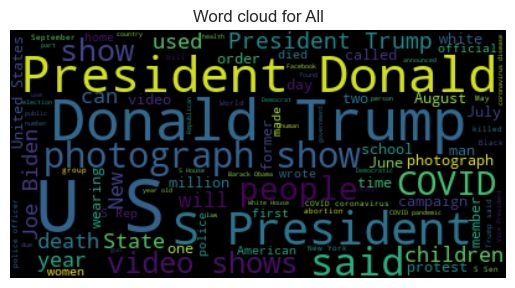

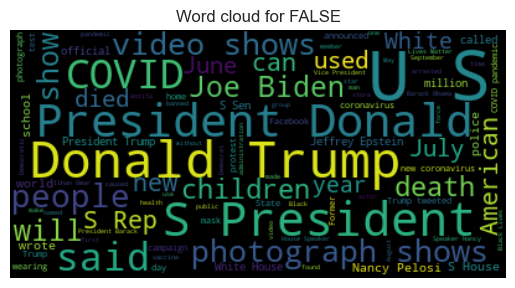

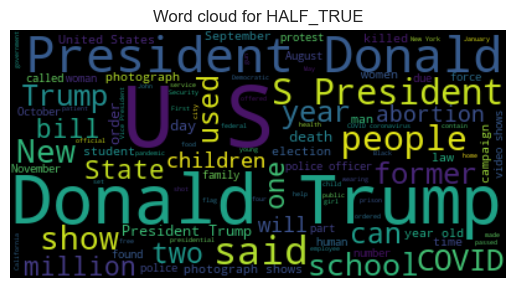

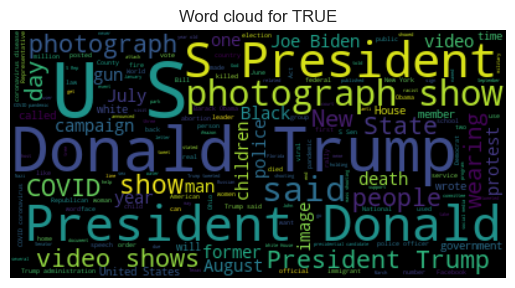

In [6]:
%autoreload
titles = ["All", *RAWFCLabel]
os.makedirs("../figures/rawfc/wordclouds", exist_ok=True)
for title in titles:
    if title == "All":
        text = dataframe_to_text(data, ["claim"])
    else:
        filtered_data = data[data["label"] == title.value]
        text = dataframe_to_text(filtered_data, ["claim"])
    title = f"Word cloud for {title.name if title != 'All' else 'All'}"
    save_path = f"../figures/rawfc/wordclouds/{title}.png"
    show_word_cloud(text, title, file_path=save_path)

## Label distribution 

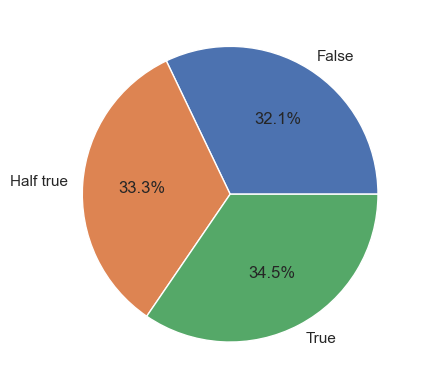

In [4]:
plt.pie(
    [data[data["label"] == label.value].shape[0] for label in RAWFCLabel],
    labels=[label_to_name(label) for label in RAWFCLabel],
    autopct="%.1f%%",
)
plt.savefig("../figures/rawfc/total_distribution.pdf")
plt.show()